## PROMOTE GENDER EQUALITY AND EMPOWER WOMEN

## Análise Exploratória de Dados

In [86]:
from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## 1. Lendo os dados

In [87]:
# Dados incompletos coletados do site http://hdr.undp.org/en/content/developing-regions  (menu esquerda 'Download DB 2018')
filename = 'Dados/HDR_2018_data.xlsx'
first_data = pd.read_excel(filename)

# Dados coletados a partir de outra fonte para categorizar os países por região e tipo de renda
metadata_filename = 'Dados/HDR_2018_country_metadata.xlsx'
country_metadata = pd.read_excel(metadata_filename)

In [88]:
print(first_data.shape)
print(country_metadata.shape)

(25636, 34)
(217, 4)


In [89]:
first_data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,9999
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0,168.0,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.0,68.0,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,85.0,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,35.0,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,147.0,NaN


In [90]:
country_metadata.head()

,Code,Long Name,Income Group,Region
0,AFG,Islamic State of Afghanistan,Low income,South Asia
1,ALB,Republic of Albania,Upper middle income,Europe & Central Asia
2,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,ASM,American Samoa,Upper middle income,East Asia & Pacific
4,AND,Principality of Andorra,High income,Europe & Central Asia


In [91]:
# Fazemos merge para poder categorizar os dados por região e tipo de renda
data = pd.merge(left=first_data, right=country_metadata, how='left', left_on='iso3', right_on='Code')

# Evitamos redundâncias
data.drop('Code', axis=1, inplace=True) # 1 is the axis number (0 for rows and 1 for columns) & inplace to not have to reassign a new df

In [92]:
data.shape

(25636, 37)

In [93]:
data.head()

,dimension,indicator_id,indicator_name,iso3,country_name,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,9999,Long Name,Income Group,Region
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168.0,168.0,NaN,Islamic State of Afghanistan,Low income,South Asia
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.0,68.0,NaN,Republic of Albania,Upper middle income,Europe & Central Asia
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,85.0,NaN,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,35.0,NaN,Principality of Andorra,High income,Europe & Central Asia
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145.0,147.0,NaN,People's Republic of Angola,Lower middle income,Sub-Saharan Africa


In [94]:
# Mudando o nome de algumas colunas
data.rename(columns={'dimension':'category','iso3':'code','Long Name':'long_name','Income Group':'income_group','Region':'region'},inplace=True)

In [95]:
data.head()

,category,indicator_id,indicator_name,code,country_name,1990,1991,1992,1993,1994,...,2012,2013,2014,2015,2016,2017,9999,long_name,income_group,region
0,Composite indices,146206,HDI rank,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168.0,168.0,NaN,Islamic State of Afghanistan,Low income,South Asia
1,Composite indices,146206,HDI rank,ALB,Albania,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69.0,68.0,NaN,Republic of Albania,Upper middle income,Europe & Central Asia
2,Composite indices,146206,HDI rank,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.0,85.0,NaN,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa
3,Composite indices,146206,HDI rank,AND,Andorra,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.0,35.0,NaN,Principality of Andorra,High income,Europe & Central Asia
4,Composite indices,146206,HDI rank,AGO,Angola,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,145.0,147.0,NaN,People's Republic of Angola,Lower middle income,Sub-Saharan Africa


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25636 entries, 0 to 25635
Data columns (total 37 columns):
category          25636 non-null object
indicator_id      25636 non-null int64
indicator_name    25636 non-null object
code              25636 non-null object
country_name      25636 non-null object
1990              10073 non-null float64
1991              7454 non-null float64
1992              5740 non-null float64
1993              5986 non-null float64
1994              5808 non-null float64
1995              13849 non-null float64
1996              6217 non-null float64
1997              6347 non-null float64
1998              6384 non-null float64
1999              6462 non-null float64
2000              16612 non-null float64
2001              7556 non-null float64
2002              7582 non-null float64
2003              7627 non-null float64
2004              7708 non-null float64
2005              17048 non-null float64
2006              12885 non-null float64
2007   

Os dados parecem estar corretamente classificados, sendo:
* 'object' os dados de string
* 'int' e 'float64' os dados numéricos

## Convertendo o dataset

Segundo o princípio de 'tidy data':
* Colunas representas variaveis diferentes
* Linhas representam observacoes individuais

Então nosso dataset tem que ser modificado para ter nas colunas os dados que nos interessam.

In [97]:
# Criamos uma linha por pais, indicador e ano
data_per_year = pd.melt(frame=data, id_vars=['category','indicator_id','indicator_name','code', 'country_name','long_name','income_group','region'], var_name = 'year')

In [98]:
data_per_year.head()

,category,indicator_id,indicator_name,code,country_name,long_name,income_group,region,year,value
0,Composite indices,146206,HDI rank,AFG,Afghanistan,Islamic State of Afghanistan,Low income,South Asia,1990,NaN
1,Composite indices,146206,HDI rank,ALB,Albania,Republic of Albania,Upper middle income,Europe & Central Asia,1990,NaN
2,Composite indices,146206,HDI rank,DZA,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1990,NaN
3,Composite indices,146206,HDI rank,AND,Andorra,Principality of Andorra,High income,Europe & Central Asia,1990,NaN
4,Composite indices,146206,HDI rank,AGO,Angola,People's Republic of Angola,Lower middle income,Sub-Saharan Africa,1990,NaN


In [99]:
data_per_year.shape

(743444, 10)

In [100]:
data_per_year.drop('indicator_id', axis=1, inplace=True)
data_per_year.drop('long_name', axis=1, inplace=True)

In [101]:
data_per_year.head()

,category,indicator_name,code,country_name,income_group,region,year,value
0,Composite indices,HDI rank,AFG,Afghanistan,Low income,South Asia,1990,NaN
1,Composite indices,HDI rank,ALB,Albania,Upper middle income,Europe & Central Asia,1990,NaN
2,Composite indices,HDI rank,DZA,Algeria,Upper middle income,Middle East & North Africa,1990,NaN
3,Composite indices,HDI rank,AND,Andorra,High income,Europe & Central Asia,1990,NaN
4,Composite indices,HDI rank,AGO,Angola,Lower middle income,Sub-Saharan Africa,1990,NaN


In [102]:
# 157 indicadores diferentes estudados
indicators = data.indicator_name.unique()
print(indicators.shape)

(157,)


In [103]:
# Diferentes indicadores de gênero estudados
gender_indicators = data[(data.category == 'Gender')].indicator_name.unique()
print(gender_indicators)

['Adolescent birth rate (births per 1,000 women ages 15-19)'
 'Antenatal care coverage, at least one visit (%)'
 'Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)'
 'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)'
 'Estimated gross national income per capita, female (2011 PPP $)'
 'Estimated gross national income per capita, male (2011 PPP $)'
 'Female share of employment in senior and middle management (%)'
 'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)'
 'Gender Development Index (GDI)' 'Gender Inequality Index (GII)'
 'Human Development Index (HDI), female'
 'Human Development Index (HDI), male'
 'Mandatory paid maternity leave (days)'
 'Maternal mortality ratio (deaths per 100,000 live births)'
 'Proportion of births attended by skilled health personnel (%)'
 'Share of employment in nonagriculture, female (%

In [104]:
# Depois desse comando, vamos ter um MultiIndex com uma linha por pais e ano e todos os indicadores em colunas
data_tidy = data_per_year.pivot_table(index=['code', 'country_name','income_group','region','year'],
                                     columns = 'indicator_name', values = 'value')

In [105]:
data_tidy.head(50)

indicator_name                                                 Adjusted net savings (% of GNI)  \
code country_name income_group        region             year                                    
AFG  Afghanistan  Low income          South Asia         1990                              NaN   
                                                         1991                              NaN   
                                                         1992                              NaN   
                                                         1993                              NaN   
                                                         1994                              NaN   
                                                         1995                              NaN   
                                                         1996                              NaN   
                                                         1997                              NaN   
                                                         1998                              NaN   
                                                         1999                              NaN   
                                                         2000                              NaN   
                                                         2001                              NaN   
                                                         2002                              NaN   
                                                         2003                              NaN   
                                                         2004                              NaN   
                                                         2005                              NaN   
                                                         2006                              NaN   
                                                         2007                              NaN   
                                                         2008                              NaN   
                                                         2009                              NaN   
                                                         2010                            -19.3   
                                                         2011                            -25.3   
                                                         2012                            -19.2   
                                                         2013                            -26.7   
                                                         2014                            -22.9   
                                                         2015                            -27.6   
                                                         2016                            -28.5   
                                                         2017                              NaN   
                                                         9999                            -28.5   
AGO  Angola       Lower middle income Sub-Saharan Africa 1990                            -48.0   
                                                         1991                              NaN   
                                                         1992                              NaN   
                                                         1993                              NaN   
                                                         1994                              NaN   
                                                         1995                              NaN   
                                                         1996                              NaN   
                                                         1997                              NaN   
                                                         1998                              NaN   
                                                         1999                   

In [106]:
data_tidy.shape

(5655, 156)

In [107]:
# Isso vai permitir voltar a um DataFrame normal
data_tidy.reset_index(inplace=True)

In [108]:
data_tidy.head()

indicator_name,code,country_name,income_group,region,year,Adjusted net savings (% of GNI),"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)",Birth registration (% under age 5),Carbon dioxide emissions (kg per 2011 PPP $ of GDP),...,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Urban population (%),"Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Vulnerable employment (% of total employment),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Working poor at PPP$3.10 a day (% of total employment),Young age (0-14) dependency ratio (per 100 people ages 15-64),Youth not in school or employment (% ages 15-24),Youth unemployment rate (female to male ratio)
0,AFG,Afghanistan,Low income,South Asia,1990,NaN,161.2,NaN,NaN,NaN,...,NaN,21.2,NaN,NaN,NaN,NaN,NaN,96.6,NaN,NaN
1,AFG,Afghanistan,Low income,South Asia,1991,NaN,NaN,NaN,NaN,NaN,...,NaN,21.3,NaN,NaN,62.0,NaN,98.9,96.5,NaN,1.01
2,AFG,Afghanistan,Low income,South Asia,1992,NaN,NaN,NaN,NaN,NaN,...,NaN,21.4,NaN,NaN,NaN,NaN,NaN,96.4,NaN,NaN
3,AFG,Afghanistan,Low income,South Asia,1993,NaN,NaN,NaN,NaN,NaN,...,NaN,21.4,NaN,NaN,NaN,NaN,NaN,96.4,NaN,NaN
4,AFG,Afghanistan,Low income,South Asia,1994,NaN,NaN,NaN,NaN,NaN,...,NaN,21.5,NaN,NaN,NaN,NaN,NaN,96.3,NaN,NaN


In [109]:
data_tidy.shape
# vemos que temos bem 1 linha por pais e ano pois : 5460 = 28 * 195 (195 paises e 28 anos estudados)

(5655, 161)

In [110]:
# Valores mais recentes para fazer análises numericas (o último ano do dataset é 2017) 
#recent_data = data_tidy[(data_tidy.year.isin([2017,9999]))]
recent_data = data_tidy[(data_tidy.year == 2017)]

In [111]:
recent_data.head()

indicator_name,code,country_name,income_group,region,year,Adjusted net savings (% of GNI),"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)",Birth registration (% under age 5),Carbon dioxide emissions (kg per 2011 PPP $ of GDP),...,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Urban population (%),"Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Vulnerable employment (% of total employment),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Working poor at PPP$3.10 a day (% of total employment),Young age (0-14) dependency ratio (per 100 people ages 15-64),Youth not in school or employment (% ages 15-24),Youth unemployment rate (female to male ratio)
27,AFG,Afghanistan,Low income,South Asia,2017,NaN,64.5,NaN,NaN,NaN,...,NaN,25.2,NaN,NaN,66.1,7.2,98.2,79.8,NaN,1.05
56,AGO,Angola,Lower middle income,Sub-Saharan Africa,2017,NaN,151.6,NaN,NaN,NaN,...,NaN,64.8,NaN,NaN,66.7,22.3,59.0,92.2,NaN,1.02
85,ALB,Albania,Upper middle income,Europe & Central Asia,2017,NaN,20.7,NaN,NaN,NaN,...,NaN,59.4,NaN,NaN,57.2,38.1,1.5,25.1,NaN,0.96
114,AND,Andorra,High income,Europe & Central Asia,2017,NaN,NaN,NaN,NaN,NaN,...,NaN,88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,ARE,United Arab Emirates,High income,Middle East & North Africa,2017,NaN,28.4,NaN,NaN,NaN,...,NaN,86.2,NaN,NaN,0.4,76.4,0.5,16.4,NaN,1.21


In [112]:
# Função para criar um df com dados de uma ou mais categorias

def data_categorias_recente(categorias):  # categorias sendo uma lista
    indicators = data[data.category.isin(categorias)].indicator_name.unique()
    other_indicators = np.array(['code','country_name','income_group','region'])
    recent_indicators = np.concatenate((other_indicators,indicators))
    return recent_data[recent_indicators]

In [113]:
# Valores mais recentes de GÊNERO para fazer análises numéricas
recent_data_gender = data_categorias_recente(['Gender'])
recent_data_gender

indicator_name,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)","Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",...,"Maternal mortality ratio (deaths per 100,000 live births)",Proportion of births attended by skilled health personnel (%),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)","Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
27,AFG,Afghanistan,Low income,South Asia,64.5,NaN,NaN,NaN,541.0,3030.0,...,396.0,NaN,11.6,27.4,1.59,NaN,NaN,NaN,7.2,1.05
56,AGO,Angola,Lower middle income,Sub-Saharan Africa,151.6,NaN,NaN,NaN,5063.0,6546.0,...,477.0,NaN,42.8,30.5,1.13,NaN,NaN,NaN,22.3,1.02
85,ALB,Albania,Upper middle income,Europe & Central Asia,20.7,NaN,NaN,NaN,9702.0,14028.0,...,29.0,NaN,37.5,27.9,0.93,NaN,NaN,NaN,38.1,0.96
114,AND,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,NaN,NaN
143,ARE,United Arab Emirates,High income,Middle East & North Africa,28.4,NaN,NaN,NaN,24973.0,84130.0,...,6.0,NaN,12.1,22.5,3.38,NaN,NaN,NaN,76.4,1.21
172,ARG,Argentina,High income,Latin America & Caribbean,62.8,NaN,NaN,NaN,12395.0,24789.0,...,52.0,NaN,40.1,38.9,1.49,NaN,NaN,NaN,50.8,1.17
201,ARM,Armenia,Upper middle income,Europe & Central Asia,23.2,NaN,NaN,NaN,6358.0,12281.0,...,25.0,NaN,42.4,18.1,1.23,NaN,NaN,NaN,40.9,1.18
230,ATG,Antigua and Barbuda,High income,Latin America & Caribbean,43.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
259,AUS,Australia,High income,East Asia & Pacific,12.9,NaN,NaN,NaN,35323.0,51857.0,...,6.0,NaN,46.6,32.7,1.04,NaN,NaN,NaN,99.2,0.91
288,AUT,Austria,High income,Europe & Central Asia,6.9,NaN,NaN,NaN,35626.0,55591.0,...,4.0,NaN,47.2,33.6,0.86,NaN,NaN,NaN,98.4,0.94


In [114]:
recent_data_gender.columns

Index(['code', 'country_name', 'income_group', 'region',
       'Adolescent birth rate (births per 1,000 women ages 15-19)',
       'Antenatal care coverage, at least one visit (%)',
       'Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)',
       'Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)',
       'Estimated gross national income per capita, female (2011 PPP $)',
       'Estimated gross national income per capita, male (2011 PPP $)',
       'Female share of employment in senior and middle management (%)',
       'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)',
       'Gender Development Index (GDI)', 'Gender Inequality Index (GII)',
       'Human Development Index (HDI), female',
       'Human Development Index (HDI), male',
       'Mandatory paid maternity leave (days)',
       'Maternal mortality ratio (

In [115]:
# Modificando nomes das colunas de genero para que estejam mais compactadas

# Jogamos fora as partes de (% of ...)
new_cols = []
for element in recent_data_gender.columns:
    if '(%' in element : 
        element = element.split(' (%')[0]
    if '(years)' in element : 
        element = element.split(' (years)')[0]
    new_cols.append(element)
recent_data_gender.columns = new_cols

# Modificando alguns na mao
recent_data_gender.rename(columns={'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level':'Female share of graduates in SME, manufacturing and construction'},inplace=True)

In [116]:
recent_data_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 27 to 5653
Data columns (total 27 columns):
code                                                                                 195 non-null object
country_name                                                                         195 non-null object
income_group                                                                         195 non-null object
region                                                                               195 non-null object
Adolescent birth rate (births per 1,000 women ages 15-19)                            185 non-null float64
Antenatal care coverage, at least one visit                                          3 non-null float64
Child marriage, women married by age 18                                              0 non-null float64
Contraceptive prevalence, any method                                                 10 non-null float64
Estimated gross national income per capita, female (20

Vemos que não há dados catalogados no ano '2017' sobre:
* Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)
* Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)
* Violence against women ever experienced, intimate partner (% of female population ages 15 and older)
* Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)

Porém esses dados se encontram preenchidos no ano '9999'. Iremos analisá-los separadamente.

In [117]:
recent_data_gender.shape

(195, 27)

In [118]:
recent_data_gender.drop('Child marriage, women married by age 18',axis=1, inplace=True)
recent_data_gender.drop('Female share of graduates in SME, manufacturing and construction',axis = 1, inplace = True)
recent_data_gender.drop('Violence against women ever experienced, intimate partner',axis = 1, inplace = True)
recent_data_gender.drop('Violence against women ever experienced, nonintimate partner',axis = 1, inplace = True)
recent_data_gender.shape

(195, 23)

## 2. Examinando dados

### 2.1. Dados numéricos

### 2017

In [119]:
recent_data_gender.describe()

,"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit","Contraceptive prevalence, any method","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Female share of employment in senior and middle management,Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)",Proportion of births attended by skilled health personnel,"Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Unmet need for family planning,Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
count,185.000000,3.000000,10.00000,178.000000,178.000000,5.000000,164.000000,157.000000,164.000000,164.000000,176.000000,182.000000,3.000000,180.000000,193.000000,180.000000,10.000000,156.000000,180.000000
mean,46.852973,85.333333,34.19000,12742.584270,22140.573034,35.220000,0.936890,0.347191,0.690957,0.730848,107.806818,169.549451,56.600000,39.678333,21.391710,1.389889,26.230000,55.370513,1.093389
std,39.886016,17.406129,14.34685,14065.674425,23019.984673,3.100323,0.076412,0.189648,0.169039,0.146339,66.389131,232.733208,24.690281,11.448336,11.073365,0.907027,6.281905,29.149741,0.203720
min,0.300000,65.800000,13.40000,149.000000,594.000000,30.300000,0.425000,0.039000,0.223000,0.391000,0.000000,3.000000,41.700000,4.200000,0.100000,0.470000,14.500000,1.700000,0.630000
25%,13.400000,78.400000,26.17500,2548.750000,4926.500000,35.200000,0.908500,0.181000,0.567750,0.619750,84.000000,14.250000,42.350000,34.975000,13.100000,1.000000,23.025000,29.950000,0.980000
50%,37.500000,91.000000,33.65000,6763.000000,14243.000000,35.400000,0.960500,0.354000,0.728000,0.752500,98.000000,54.000000,43.000000,43.200000,20.000000,1.180000,26.950000,53.150000,1.070000
75%,69.500000,95.100000,37.92500,19326.000000,31722.750000,36.400000,0.986000,0.493000,0.824250,0.843000,119.250000,229.000000,64.050000,47.325000,28.500000,1.497500,29.475000,81.075000,1.180000
max,192.000000,99.200000,60.90000,69508.000000,135961.000000,38.800000,1.031000,0.834000,0.945000,0.953000,630.000000,1360.000000,85.100000,59.000000,55.700000,8.600000,38.000000,100.000000,2.500000


In [120]:
# Removendo as colunas que apresentaram menos de 10% (count < 19.5) dos dados preenchidos
recent_data_gender.drop('Antenatal care coverage, at least one visit',axis=1,inplace=True)
recent_data_gender.drop('Contraceptive prevalence, any method',axis=1,inplace=True)
recent_data_gender.drop('Female share of employment in senior and middle management',axis=1,inplace=True)
recent_data_gender.drop('Proportion of births attended by skilled health personnel',axis=1,inplace=True)
recent_data_gender.drop('Unmet need for family planning',axis=1,inplace=True)
recent_data_gender.shape

(195, 18)

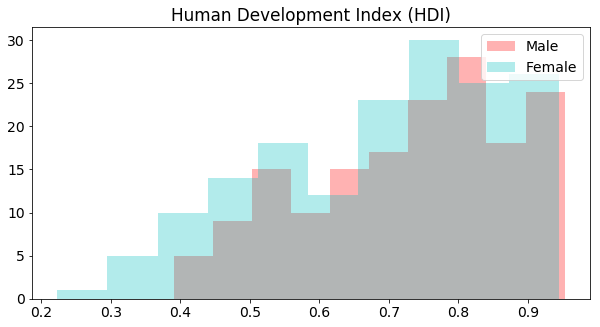

In [121]:
rdg_HDI = recent_data_gender[['Human Development Index (HDI), female','Human Development Index (HDI), male']].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_HDI['Human Development Index (HDI), male'], color='r', alpha=0.3)
ax1.hist(rdg_HDI['Human Development Index (HDI), female'], color='c', alpha=0.3)
ax1.set_title('Human Development Index (HDI)')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

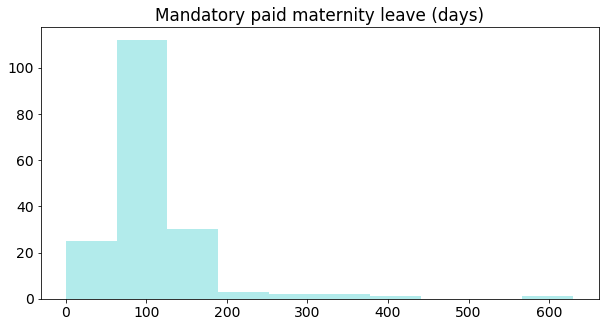

In [122]:
rdg_paidmaternity = recent_data_gender['Mandatory paid maternity leave (days)'].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_paidmaternity, color='c', alpha=0.3)
ax1.set_title('Mandatory paid maternity leave (days)')
pass

In [123]:
# Como curiosidade, quais países apresentam mais de 600 dias de licença de maternidade remunerada obrigatória (dias)?
recent_data_gender[recent_data_gender['Mandatory paid maternity leave (days)'] >= 600]

,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
4580,SMR,San Marino,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,630.0,NaN,NaN,26.7,NaN,NaN,NaN


In [124]:
# Quais países estão acima da média de dias da licença de maternidade remunerada obrigatória?
paid_maternity_mean = rdg_paidmaternity.mean()
rdg_paidmaternity_mean = recent_data_gender[recent_data_gender['Mandatory paid maternity leave (days)']>=paid_maternity_mean]
rdg_paidmaternity_mean

,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
85,ALB,Albania,Upper middle income,Europe & Central Asia,20.7,9702.0,14028.0,0.970,0.238,0.772,0.796,365.0,29.0,37.5,27.9,0.93,38.1,0.96
201,ARM,Armenia,Upper middle income,Europe & Central Asia,23.2,6358.0,12281.0,0.969,0.262,0.740,0.764,140.0,25.0,42.4,18.1,1.23,40.9,1.18
288,AUT,Austria,High income,Europe & Central Asia,6.9,35626.0,55591.0,0.971,0.071,0.893,0.920,112.0,4.0,47.2,33.6,0.86,98.4,0.94
317,AZE,Azerbaijan,Upper middle income,Europe & Central Asia,53.5,10089.0,21152.0,0.949,0.318,0.734,0.773,126.0,25.0,43.8,16.8,1.30,27.7,1.01
462,BGD,Bangladesh,Lower middle income,South Asia,83.5,2041.0,5285.0,0.881,0.542,0.567,0.644,112.0,176.0,18.4,20.3,2.12,35.8,1.11
491,BGR,Bulgaria,Upper middle income,Europe & Central Asia,39.5,14777.0,22930.0,0.990,0.217,0.808,0.816,410.0,11.0,47.8,23.8,0.87,73.6,0.99
578,BIH,Bosnia and Herzegovina,Upper middle income,Europe & Central Asia,10.0,7723.0,15856.0,0.924,0.166,0.739,0.800,365.0,11.0,32.7,19.3,2.09,54.7,1.23
607,BLR,Belarus,Upper middle income,Europe & Central Asia,17.2,13479.0,19592.0,1.020,0.130,0.814,0.799,126.0,4.0,51.5,33.1,1.00,81.3,1.10
694,BRA,Brazil,Upper middle income,Latin America & Caribbean,61.6,10073.0,17566.0,0.992,0.407,0.755,0.761,120.0,44.0,44.4,11.3,1.35,67.5,1.14
926,CHL,Chile,High income,Latin America & Caribbean,45.6,15137.0,28809.0,0.961,NaN,0.823,0.856,126.0,22.0,43.1,15.8,1.15,71.3,1.09


In [125]:
rdg_paidmaternity_mean['income_group'].value_counts()

High income            22
Upper middle income    19
Lower middle income    10
Low income              3
Name: income_group, dtype: int64

Podemos observar que a maioria dos países, em que a quantidade de dias de licença maternidade paga obrigatório é maior do que é a média, estão concentrados nos países de alta renda ou renda média alta.

In [126]:
rdg_paidmaternity_mean['region'].value_counts()

Europe & Central Asia         38
Latin America & Caribbean      6
Middle East & North Africa     3
East Asia & Pacific            3
Sub-Saharan Africa             2
South Asia                     2
Name: region, dtype: int64

A Europa e a Ásia Central são as regiões mais bem desenvolvidas nesse aspecto.

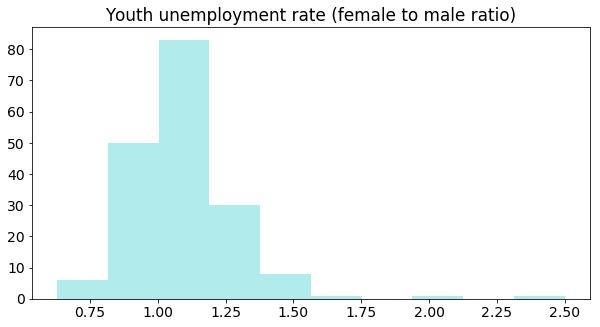

In [127]:
rdg_unemployment = recent_data_gender['Youth unemployment rate (female to male ratio)'].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_unemployment, color='c', alpha=0.3)
ax1.set_title('Youth unemployment rate (female to male ratio)')
pass

In [128]:
# Quais países estão com proporção female/male de desemprego juvenil acima da média? (SITUAÇÃO PREOCUPANTE)
unemployment_mean = rdg_unemployment.mean()
rdg_unemployment_mean = recent_data_gender[recent_data_gender['Youth unemployment rate (female to male ratio)'] >= unemployment_mean]
print('Quantidade de países nesse estado preocupante:', rdg_unemployment_mean.shape[0], '\nSão eles (incluindo o Brasil!):')
rdg_unemployment_mean

Quantidade de países nesse estado preocupante: 77 
São eles (incluindo o Brasil!):


,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
143,ARE,United Arab Emirates,High income,Middle East & North Africa,28.4,24973.0,84130.0,0.968,0.232,0.832,0.859,45.0,6.0,12.1,22.5,3.38,76.4,1.21
172,ARG,Argentina,High income,Latin America & Caribbean,62.8,12395.0,24789.0,0.997,0.358,0.816,0.819,90.0,52.0,40.1,38.9,1.49,50.8,1.17
201,ARM,Armenia,Upper middle income,Europe & Central Asia,23.2,6358.0,12281.0,0.969,0.262,0.740,0.764,140.0,25.0,42.4,18.1,1.23,40.9,1.18
404,BEN,Benin,Low income,Sub-Saharan Africa,86.1,1795.0,2329.0,0.875,0.611,0.479,0.547,98.0,405.0,55.7,7.2,1.17,28.6,1.11
433,BFA,Burkina Faso,Low income,Sub-Saharan Africa,104.3,1289.0,2014.0,0.870,0.610,0.393,0.452,98.0,371.0,48.3,11.0,2.22,34.5,1.56
462,BGD,Bangladesh,Lower middle income,South Asia,83.5,2041.0,5285.0,0.881,0.542,0.567,0.644,112.0,176.0,18.4,20.3,2.12,35.8,1.11
520,BHR,Bahrain,High income,Middle East & North Africa,13.4,18774.0,55130.0,0.931,0.222,0.805,0.865,60.0,15.0,20.6,15.0,8.60,75.4,2.00
549,BHS,Bahamas,High income,Latin America & Caribbean,26.7,22156.0,31397.0,NaN,0.340,NaN,NaN,91.0,80.0,48.0,21.8,1.20,NaN,1.18
578,BIH,Bosnia and Herzegovina,Upper middle income,Europe & Central Asia,10.0,7723.0,15856.0,0.924,0.166,0.739,0.800,365.0,11.0,32.7,19.3,2.09,54.7,1.23
607,BLR,Belarus,Upper middle income,Europe & Central Asia,17.2,13479.0,19592.0,1.020,0.130,0.814,0.799,126.0,4.0,51.5,33.1,1.00,81.3,1.10


In [129]:
rdg_unemployment_mean['income_group'].value_counts()

Upper middle income    31
Lower middle income    19
High income            14
Low income             13
Name: income_group, dtype: int64

In [130]:
rdg_unemployment_mean['region'].value_counts()

Sub-Saharan Africa            22
Latin America & Caribbean     22
Middle East & North Africa    13
Europe & Central Asia          9
East Asia & Pacific            7
South Asia                     4
Name: region, dtype: int64

Sub-Saharan Africa e Latin America & Caribbean são as regiões mais preocupantes e, juntas, representam 57,14% do total de países acima da média da proporção de desemprego female/male.

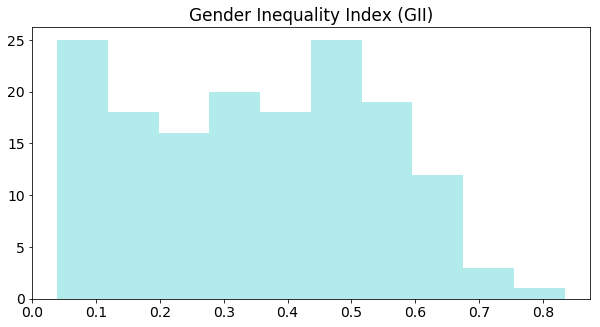

In [131]:
# Quanto maior o valor de 'Gender Inequality Index (GII)', mais disparidades entre mulheres e homens e mais perda para o desenvolvimento humano!
rdg_GII = recent_data_gender['Gender Inequality Index (GII)'].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_GII, color='c', alpha=0.3)
ax1.set_title('Gender Inequality Index (GII)')
pass

In [132]:
# Como curiosidade, qual a proporção de países que apresentam GII maior que 0.5?
qtd_paises = recent_data_gender['Gender Inequality Index (GII)'].dropna().shape[0]
print('Percentual de países em situação preocupante (GII acima de 0.5):',(recent_data_gender[recent_data_gender['Gender Inequality Index (GII)']>=0.5].shape[0]/qtd_paises)*100)
recent_data_gender[recent_data_gender['Gender Inequality Index (GII)']>=0.5]

Percentual de países em situação preocupante (GII acima de 0.5): 24.840764331210192


,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
27,AFG,Afghanistan,Low income,South Asia,64.5,541.0,3030.0,0.625,0.653,0.364,0.583,90.0,396.0,11.6,27.4,1.59,7.2,1.05
404,BEN,Benin,Low income,Sub-Saharan Africa,86.1,1795.0,2329.0,0.875,0.611,0.479,0.547,98.0,405.0,55.7,7.2,1.17,28.6,1.11
433,BFA,Burkina Faso,Low income,Sub-Saharan Africa,104.3,1289.0,2014.0,0.870,0.610,0.393,0.452,98.0,371.0,48.3,11.0,2.22,34.5,1.56
462,BGD,Bangladesh,Lower middle income,South Asia,83.5,2041.0,5285.0,0.881,0.542,0.567,0.644,112.0,176.0,18.4,20.3,2.12,35.8,1.11
839,CAF,Central African Republic,Low income,Sub-Saharan Africa,103.8,521.0,809.0,0.780,0.673,0.319,0.409,98.0,882.0,29.8,8.6,1.24,9.7,1.06
1013,CMR,Cameroon,Lower middle income,Sub-Saharan Africa,105.8,2751.0,3878.0,0.866,0.569,0.513,0.593,98.0,596.0,42.5,27.1,1.49,30.0,1.19
1042,COD,Congo (Democratic Republic of the),Low income,Sub-Saharan Africa,124.2,703.0,889.0,0.852,0.652,0.420,0.493,98.0,693.0,35.8,8.2,1.39,24.2,1.11
1071,COG,Congo,Lower middle income,Sub-Saharan Africa,111.8,4905.0,6483.0,0.934,0.578,0.583,0.624,105.0,442.0,47.3,14.0,1.14,21.0,0.98
1622,ETH,Ethiopia,Low income,Sub-Saharan Africa,62.5,1304.0,2136.0,0.846,0.502,0.424,0.501,90.0,353.0,59.0,37.3,2.42,29.1,1.45
1767,GAB,Gabon,Upper middle income,Sub-Saharan Africa,95.3,11789.0,20825.0,0.911,0.534,0.670,0.735,98.0,291.0,24.0,17.4,1.90,53.7,1.15


### Trabalhando com o ano '9999'

In [133]:
different_data = data_tidy[data_tidy.year == 9999]

In [134]:
different_data.head()

indicator_name,code,country_name,income_group,region,year,Adjusted net savings (% of GNI),"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)",Birth registration (% under age 5),Carbon dioxide emissions (kg per 2011 PPP $ of GDP),...,"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)",Urban population (%),"Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Vulnerable employment (% of total employment),Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Working poor at PPP$3.10 a day (% of total employment),Young age (0-14) dependency ratio (per 100 people ages 15-64),Youth not in school or employment (% ages 15-24),Youth unemployment rate (female to male ratio)
28,AFG,Afghanistan,Low income,South Asia,9999,-28.5,64.5,58.6,42.0,0.16,...,24.5,25.2,50.8,NaN,66.1,7.2,98.2,79.8,NaN,1.05
57,AGO,Angola,Lower middle income,Sub-Saharan Africa,9999,-38.4,151.6,81.6,25.0,0.21,...,38.0,64.8,34.8,NaN,66.7,22.3,59.0,92.2,NaN,1.02
86,ALB,Albania,Upper middle income,Europe & Central Asia,9999,6.9,20.7,97.3,99.0,0.18,...,12.9,59.4,24.6,NaN,57.2,38.1,1.5,25.1,32.8,0.96
115,AND,Andorra,High income,Europe & Central Asia,9999,NaN,NaN,NaN,100.0,NaN,...,NaN,88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,ARE,United Arab Emirates,High income,Middle East & North Africa,9999,NaN,28.4,100.0,100.0,0.36,...,NaN,86.2,NaN,NaN,0.4,76.4,0.5,16.4,NaN,1.21


In [135]:
# Função para criar um df com dados de uma ou mais categorias

def data_categorias_diferente(categorias):  # categorias sendo uma lista
    indicators = data[data.category.isin(categorias)].indicator_name.unique()
    other_indicators = np.array(['code','country_name','income_group','region'])
    different_indicators = np.concatenate((other_indicators,indicators))
    return different_data[different_indicators]

In [136]:
# Valores mais recentes de GÊNERO para fazer análises numéricas
different_data_gender = data_categorias_diferente(['Gender'])
different_data_gender.head()

indicator_name,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Antenatal care coverage, at least one visit (%)","Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)","Contraceptive prevalence, any method (% of married or in-union women of reproductive age, 15–49 years)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",...,"Maternal mortality ratio (deaths per 100,000 live births)",Proportion of births attended by skilled health personnel (%),"Share of employment in nonagriculture, female (% of total employment in nonagriculture)",Share of seats in parliament (% held by women),Total unemployment rate (female to male ratio),"Unmet need for family planning (% of married or in-union women of reproductive age, 15–49 years)","Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)",Women with account at financial institution or with mobile money-service provider (% of female population ages 15 and older),Youth unemployment rate (female to male ratio)
28,AFG,Afghanistan,Low income,South Asia,64.5,58.6,35.0,22.5,541.0,3030.0,...,396.0,50.5,11.6,27.4,1.59,24.5,50.8,NaN,7.2,1.05
57,AGO,Angola,Lower middle income,Sub-Saharan Africa,151.6,81.6,30.0,13.7,5063.0,6546.0,...,477.0,46.9,42.8,30.5,1.13,38.0,34.8,NaN,22.3,1.02
86,ALB,Albania,Upper middle income,Europe & Central Asia,20.7,97.3,10.0,69.3,9702.0,14028.0,...,29.0,NaN,37.5,27.9,0.93,12.9,24.6,NaN,38.1,0.96
115,AND,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,NaN,NaN
144,ARE,United Arab Emirates,High income,Middle East & North Africa,28.4,100.0,NaN,NaN,24973.0,84130.0,...,6.0,99.9,12.1,22.5,3.38,NaN,NaN,NaN,76.4,1.21


In [137]:
different_data_gender = different_data_gender[['country_name','income_group','region','Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)','Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)','Violence against women ever experienced, intimate partner (% of female population ages 15 and older)','Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)']]
different_data_gender.head()

indicator_name,country_name,income_group,region,"Child marriage, women married by age 18 (% of women ages 20–24 years who are married or in union)","Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)","Violence against women ever experienced, intimate partner (% of female population ages 15 and older)","Violence against women ever experienced, nonintimate partner (% of female population ages 15 and older)"
28,Afghanistan,Low income,South Asia,35.0,NaN,50.8,NaN
57,Angola,Lower middle income,Sub-Saharan Africa,30.0,9.9,34.8,NaN
86,Albania,Upper middle income,Europe & Central Asia,10.0,13.4,24.6,NaN
115,Andorra,High income,Europe & Central Asia,NaN,NaN,NaN,NaN
144,United Arab Emirates,High income,Middle East & North Africa,NaN,17.3,NaN,NaN


In [138]:
# Modificando nomes das colunas de gênero para que estejam mais compactadas

# Jogamos fora as partes de (% of ...)
new_cols = []
for element in different_data_gender.columns:
    if '(%' in element : 
        element = element.split(' (%')[0]
    if '(years)' in element : 
        element = element.split(' (years)')[0]
    new_cols.append(element)
different_data_gender.columns = new_cols

# Modificando alguns na mão
different_data_gender.rename(columns={'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level':'Female share of graduates in SME, manufacturing and construction'},inplace=True)

In [139]:
different_data_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 28 to 5654
Data columns (total 7 columns):
country_name                                                        195 non-null object
income_group                                                        195 non-null object
region                                                              195 non-null object
Child marriage, women married by age 18                             125 non-null float64
Female share of graduates in SME, manufacturing and construction    106 non-null float64
Violence against women ever experienced, intimate partner           107 non-null float64
Violence against women ever experienced, nonintimate partner        56 non-null float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [140]:
different_data_gender.describe()

,"Child marriage, women married by age 18","Female share of graduates in SME, manufacturing and construction","Violence against women ever experienced, intimate partner","Violence against women ever experienced, nonintimate partner"
count,125.000000,106.000000,107.000000,56.000000
mean,23.400000,13.997170,28.371963,7.541071
std,14.889919,6.956661,13.762129,7.813759
min,2.000000,4.500000,6.100000,0.100000
25%,11.000000,9.700000,19.250000,3.000000
50%,22.000000,13.300000,25.000000,5.000000
75%,31.000000,16.275000,35.100000,9.200000
max,76.000000,47.300000,67.600000,47.300000


### 2007 - 2017
#### O indicador 'Female share of graduates in SME, manufacturing and construction' no ano '9999' é equivalente ao intervalo de '2007 - 2017', como pode ser observar em 'Dados/HDR_2018_all_indicators.xlsx''

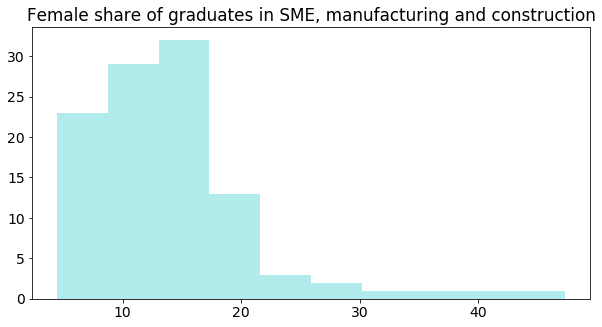

In [141]:
ddg_graduation = different_data_gender['Female share of graduates in SME, manufacturing and construction'].dropna()

fig, ax1 = plt.subplots(figsize=(10,5))

matplotlib.rcParams.update({'font.size': 14})
ax1.hist(ddg_graduation, color='c', alpha=0.3)
ax1.set_title('Female share of graduates in SME, manufacturing and construction')
pass

In [142]:
# Quais países possuem mais de 40% das mulheres graduadas em SME, manufacturing and construction?
different_data_gender[different_data_gender['Female share of graduates in SME, manufacturing and construction'] >= 40]

,country_name,income_group,region,"Child marriage, women married by age 18","Female share of graduates in SME, manufacturing and construction","Violence against women ever experienced, intimate partner","Violence against women ever experienced, nonintimate partner"
3421,Myanmar,Lower middle income,East Asia & Pacific,16.0,47.3,17.3,NaN


### 2.2. Dados categóricos

In [143]:
# Todos os paises nao tem dados para todas as categorias
data['country_name'].value_counts(dropna=False)

Mexico                                 156
Thailand                               154
Colombia                               154
Brazil                                 154
Dominican Republic                     154
Viet Nam                               154
El Salvador                            153
Moldova (Republic of)                  153
Albania                                153
Indonesia                              153
Ghana                                  152
Kyrgyzstan                             152
Ecuador                                152
Algeria                                152
Ethiopia                               151
Philippines                            151
Armenia                                151
Ukraine                                151
Peru                                   151
Tunisia                                151
Egypt                                  151
Mongolia                               150
Nepal                                  150
Serbia     

In [144]:
# Todos os indicadores nao tem o mesmo numero de respostas...
print(pd.DataFrame(data['indicator_name'].value_counts(dropna=False)))

                                                    indicator_name
Population using improved sanitation facilities...             195
Population using improved drinking-water source...             195
Total population (millions)                                    195
Urban population (%)                                           195
Red List Index (value)                                         195
Tuberculosis incidence (per 100,000 people)                    194
Infants lacking immunization, DPT (% of one-yea...             193
Renewable energy consumption (% of total final ...             193
Share of seats in parliament (% held by women)                 193
Infants lacking immunization, measles (% of one...             193
Homicide rate (per 100,000 people)                             193
Mortality rate, infant (per 1,000 live births)                 193
Carbon dioxide emissions, per capita (tonnes)                  193
Mobile phone subscriptions (per 100 people)                   

In [145]:
#Numero de respostas por indicador de gênero
print(pd.DataFrame(data[(data.category == 'Gender')]['indicator_name'].value_counts(dropna=False)))

                                                    indicator_name
Share of seats in parliament (% held by women)                 193
Adolescent birth rate (births per 1,000 women a...             185
Maternal mortality ratio (deaths per 100,000 li...             182
Proportion of births attended by skilled health...             182
Youth unemployment rate (female to male ratio)                 180
Total unemployment rate (female to male ratio)                 180
Share of employment in nonagriculture, female (...             180
Estimated gross national income per capita, mal...             178
Estimated gross national income per capita, fem...             178
Mandatory paid maternity leave (days)                          178
Contraceptive prevalence, any method (% of marr...             170
Human Development Index (HDI), male                            168
Human Development Index (HDI), female                          168
Gender Development Index (GDI)                                

### Visualizando

In [146]:
def qnt_indicadores(col = 'country_name', category = "", ano = 0):
    #tirar o 9999 inicialmente
    not_9999 = data_per_year[data_per_year.year != 9999]
    # com dropna() tiramos os registros de pais-indicador-ano que não estão informados
    dpy_notna = not_9999.dropna()
    if (ano):
        dpy_notna = dpy_notna[dpy_notna.year == ano]
    if (category != ""):
        dpy_notna = dpy_notna[dpy_notna.category == category]
    qnt_indic = pd.DataFrame(dpy_notna.groupby(col).count()['value'])
    qnt_indic = qnt_indic.rename(columns={'value': 'Quantidade de Indicadores'})
    return qnt_indic

In [147]:
def qnt_indicadores_years(col = 'country_name', category = ""):
    myData = data
    if (category != ""):
        myData = myData[myData.category == category]
    cols = ['country_name','indicator_id', 'indicator_name', 'code', 'category', 'long_name', 'income_group', 'region',9999]
    cols.remove(col)
    myData = myData.drop(columns=cols)
    myData = myData.set_index(col)
    myData = myData.groupby(col)
    myData = pd.DataFrame(myData.count())
    return myData

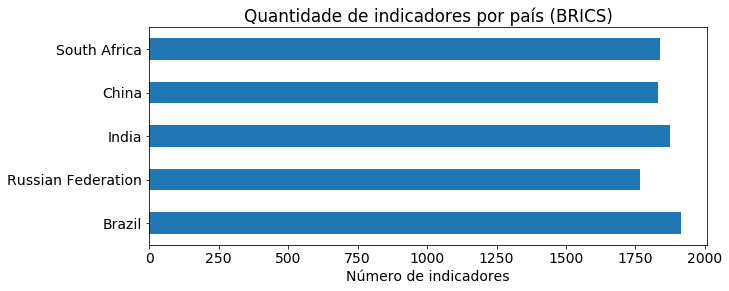

In [148]:
# Visualizar quantidade de indicadores por país do BRICS
qnt_indic_por_pais = qnt_indicadores()
brics = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']
qnt_indic_brics = qnt_indic_por_pais.loc[brics]
ax = qnt_indic_brics.plot(kind='barh', title = 'Quantidade de indicadores por país (BRICS)', figsize = (10,4), legend=False)
ax.set_ylabel('')
ax.set_xlabel('Número de indicadores')
pass

Text(0.5, 0, 'Número de indicadores')

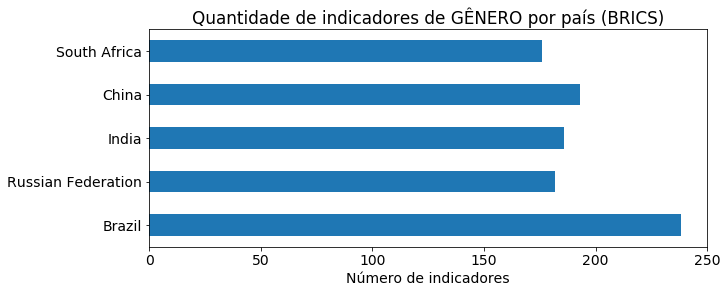

In [149]:
# Visualizar indicadores de gênero por país do BRICS
qnt_indic_gender_por_pais = qnt_indicadores(category = 'Gender')
qnt_indic_gender_brics = qnt_indic_gender_por_pais.loc[brics]
ax = qnt_indic_gender_brics.plot(kind='barh', title = 'Quantidade de indicadores de GÊNERO por país (BRICS)', figsize = (10,4), legend=False)
ax.set_ylabel('')
ax.set_xlabel('Número de indicadores')

Text(0.5, 0, 'Ano')

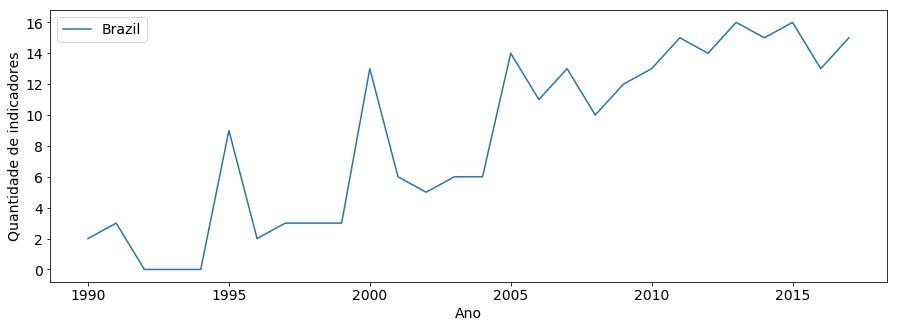

In [150]:
# Evolução da coleta de dados de indicadores de gênero no Brazil:
qnt_indic_gender_no_tempo_por_pais = qnt_indicadores_years(category = 'Gender')
qnt_indic_gender_no_tempo_brazil = qnt_indic_gender_no_tempo_por_pais.loc[['Brazil']]
ax = qnt_indic_gender_no_tempo_brazil.iloc[0].plot(figsize = (15,5), legend=['Brazil'])
ax.set_ylabel('Quantidade de indicadores')
ax.set_xlabel('Ano')

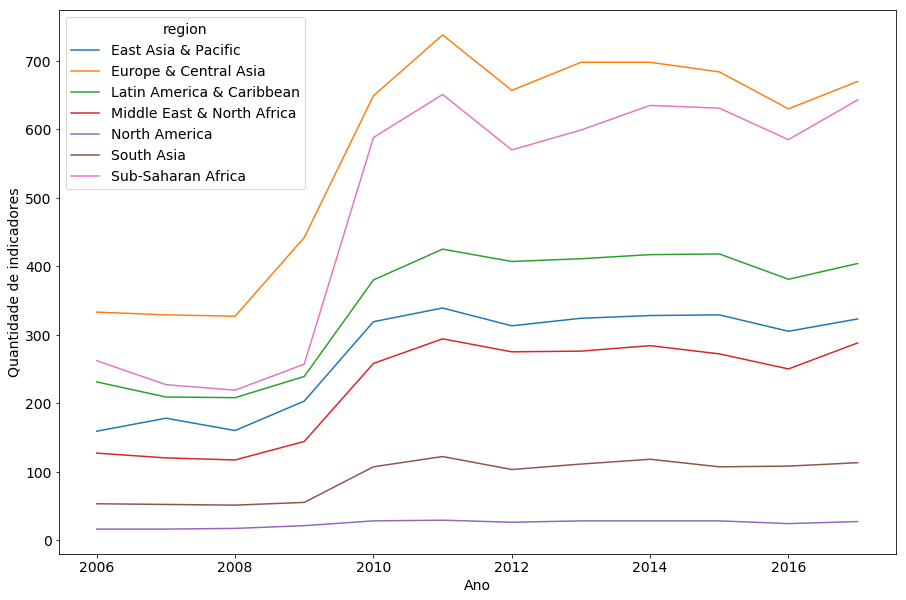

In [151]:
#evolução da coleta de dados de indicadores de genero em relação a regiao:
qnt_indic_gender_no_tempo_por_regiao = qnt_indicadores_years(col='region', category = 'Gender')
qnt_indic_gender_no_tempo_por_regiao = qnt_indic_gender_no_tempo_por_regiao.drop(
    columns=[1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002, 2003, 2004, 2005])
ax = qnt_indic_gender_no_tempo_por_regiao.transpose().plot(figsize=(15,10))
ax.set_ylabel('Quantidade de indicadores')
ax.set_xlabel('Ano')
pass

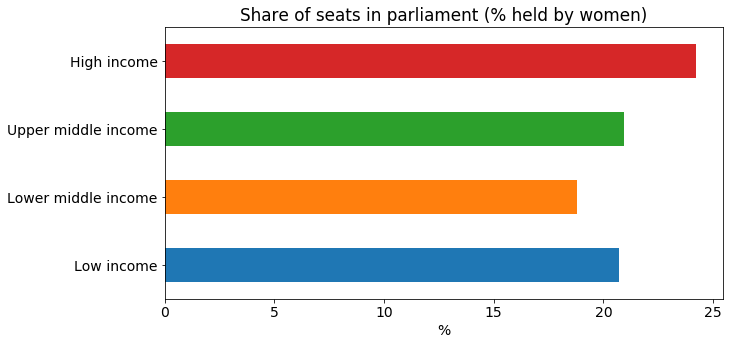

In [152]:
# obs: ao calcular a media, o panda não considera os valores NaN
rdg_income_grouped = recent_data_gender.rename(columns= {'income_group': "Income Group"}).groupby('Income Group')
seats_par = rdg_income_grouped["Share of seats in parliament"] #(% held by women)
mean_seats_par = seats_par.describe()['mean']
mean_seats_par = mean_seats_par.reindex(index = ['Low income', 'Lower middle income', 'Upper middle income', 'High income'])
ax = mean_seats_par.plot(kind='barh', title = 'Share of seats in parliament (% held by women)', figsize = (10,5))
ax.set_xlabel('%')
ax.set_ylabel('')
pass

### Examinando por categoria

## PERGUNTA 1 - Quais sao os paises com mais adolescentes grávidas ? 

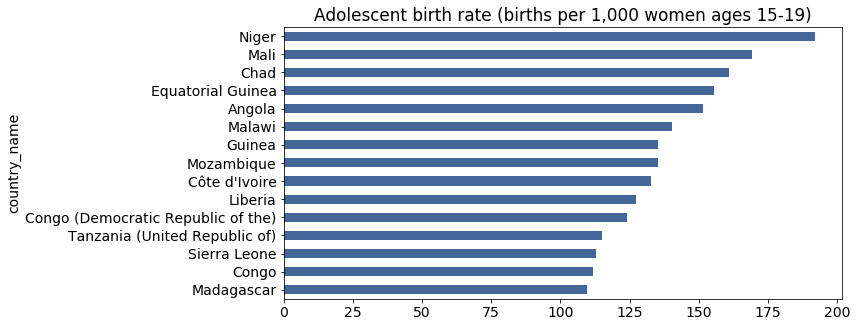

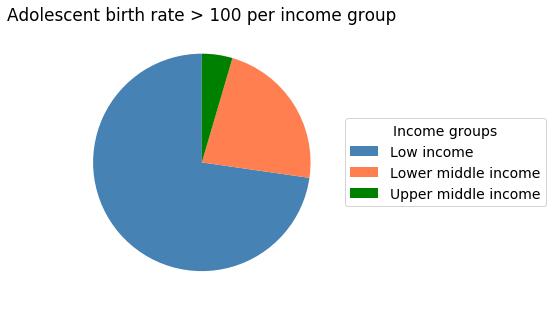

In [153]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False, sharey=False, figsize=(5,15))
matplotlib.rcParams.update({'font.size': 14})

# Primeiro plot : barh

column_toPlot = 'Adolescent birth rate (births per 1,000 women ages 15-19)'
adolescentBirthRate = recent_data_gender[['country_name',column_toPlot,'income_group']].dropna() # Pegamos dados que nos interessam

adolescentBirthRate = adolescentBirthRate.sort_values(by = column_toPlot, ascending = False) # Ordenamos dados em funcao do birth rate
adolescentBirthRate_max = adolescentBirthRate.head(15).sort_values(by = column_toPlot) # Permite colocar o maior acima do plot
adolescentBirthRate_max.plot(kind='barh', x='country_name', y = column_toPlot,figsize=(10, 5), color='#446699', title = column_toPlot, legend = None)

# Segundo plot : fatias

adolescentBirthRate.rename(columns={column_toPlot:'birth_rate'}, inplace=True)  # mais facil para filtrar no comando seguinte
#Filtramos os que sao maiores do que 100
adolescentBirthRate_counts100 = adolescentBirthRate[(adolescentBirthRate.birth_rate >= 100)].income_group.value_counts()

fig, ax = plt.subplots(figsize=(5, 5))
palette_income = {'Low income':'steelblue', 'Lower middle income': 'coral', 'Upper middle income' : 'green', 'High income':'red'}
plt.pie(x=adolescentBirthRate_counts100, startangle=90, colors=list(palette_income.values()))
ax.set_title("Adolescent birth rate > 100 per income group")
_ = plt.legend(adolescentBirthRate_counts100.index,title = 'Income groups',loc='center left', bbox_to_anchor=(1, 0.5))


Entre os que tem mais adolescentes grávidas, a maioria vem dos países com 'Low Income'

## PERGUNTA 2 - Homens e mulheres têm as mesmas oportunidades escolares ?

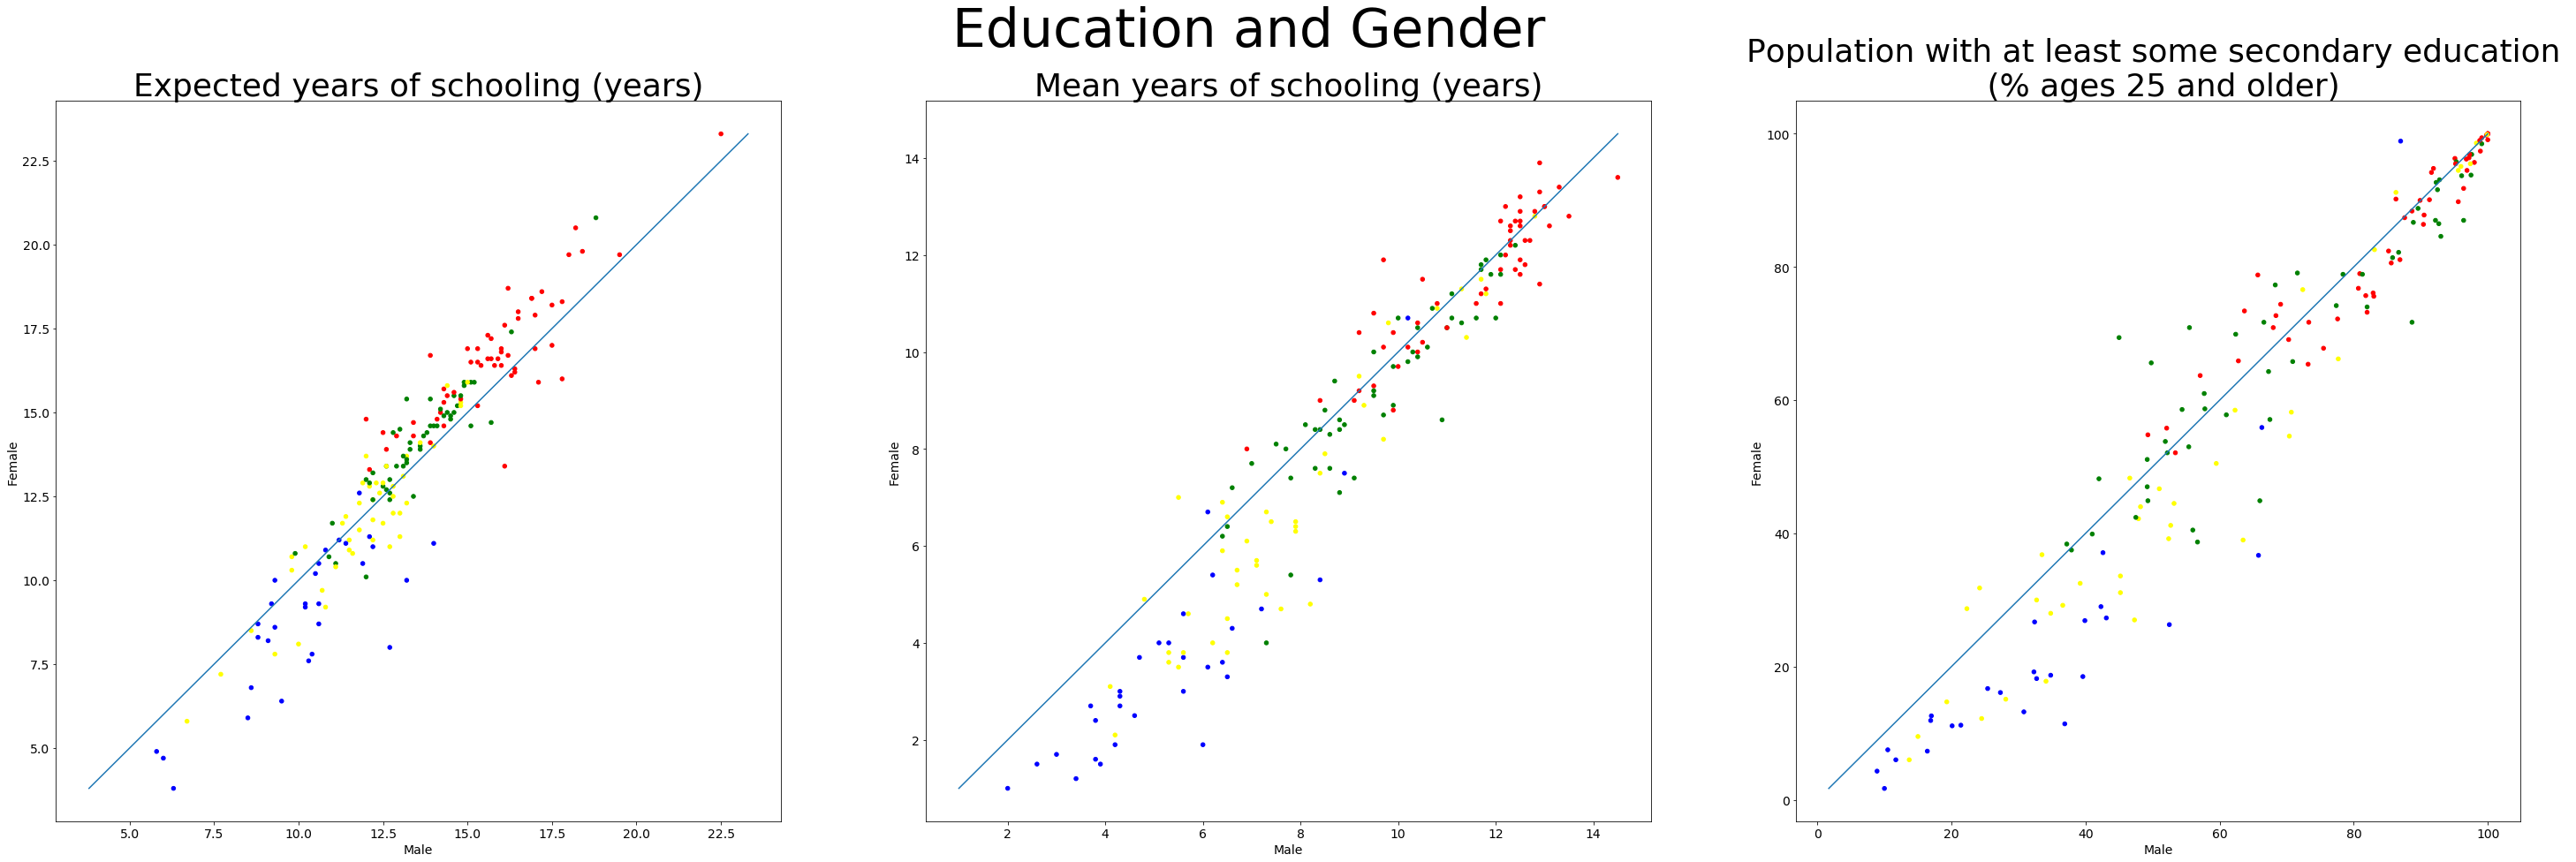

In [154]:
# Valores mais recentes de EDUCACAO e GENERO
recent_data_education_gender = data_categorias_recente(['Education', 'Gender'])

# Bloco para criarmos varios grafos sobre educaçao e gênero
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(50,15))
fig.suptitle('Education and Gender\n\n', fontsize=60)
matplotlib.rcParams.update({'font.size': 30})

# funcao que cria uma visualizacao em funcao de um criterio
axorder = [ax1,ax2,ax3]
def comparacao(order, title,criterio_educacao_male, criterio_educacao_female):
    gender_schooling = recent_data_education_gender[[criterio_educacao_male, criterio_educacao_female, 'income_group']].dropna() # Pega as colunas de interesse
    gender_schooling.rename(columns={criterio_educacao_male:'Male', criterio_educacao_female:'Female'}, inplace=True) # Renomea para visualizaçao
    colormap = []
    for row in gender_schooling[['income_group']].itertuples(index=True, name='Pandas'): # Colores em funçao do income_group
        income = getattr(row, "income_group")
        if income == 'Low income':
            color = 'blue'
        elif income == 'Lower middle income':
            color = 'yellow'
        elif income == 'Upper middle income':
            color = 'green'
        elif income == 'High income':
            color = 'red'
        else : 
            color = 'black'
        colormap.append(color)
    
    gender_schooling.plot(ax = axorder[order-1], kind = 'scatter',x = 'Male', y ='Female', c=colormap, title = title)
    # Plotamos uma reta de equaçao y=x
    border_min_male, border_min_female = gender_schooling.Male.min(), gender_schooling.Female.min()
    border_max_male, border_max_female = gender_schooling.Male.max(), gender_schooling.Female.max()
    x = np.linspace(min(border_min_male, border_min_female), max(border_max_male, border_max_female)) 
    axorder[order-1].plot(x, x, linestyle='-')

# criação da primeira visualização, junto de seu título
comparacao(1,'Expected years of schooling (years)','Expected years of schooling, male (years)','Expected years of schooling, female (years)')

# criação da segunda visualização, junto de seu título
comparacao(2,'Mean years of schooling (years)','Mean years of schooling, male (years)','Mean years of schooling, female (years)')

# criação da terceira visualização, junto de seu título
comparacao(3,'Population with at least some secondary education \n (% ages 25 and older)','Population with at least some secondary education, male (% ages 25 and older)','Population with at least some secondary education, female (% ages 25 and older)')


Nos tres graficos, vemos que quanto mais o income aumenta, mais pessoas escolarizadas (grupo vermelho no canto dacima à direita) e mais igualdade se obtem na educaçao (pontos mais proximos da reta).

Além disso, é interessante ver que nos paises com menos income (azul), têm mais homens do que mulheres escolarizados ou com educacao secundaria, e o contrario acontece em alguns paises com income 'upper middle' (verde).

De forma geral, têm uma proporçao maior de homens com educacao secundaria do que mulheres e também os homens estudam mais anos do que as mulheres (maioria dos pontos estao do lado direito da reta y=x)

## PERGUNTA 3 - Homens e mulheres possuem o mesmo rendimento bruto per capita?

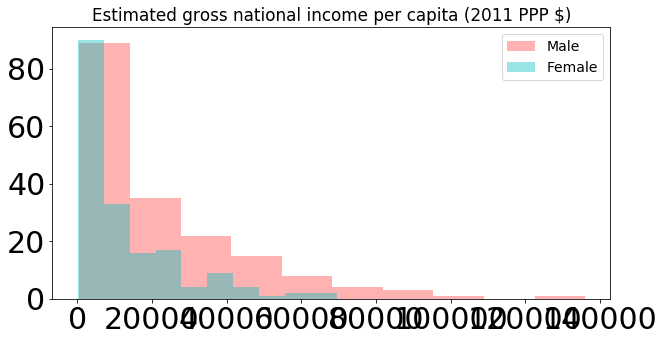

In [155]:
rdg_income = recent_data_gender[['Estimated gross national income per capita, female (2011 PPP $)','Estimated gross national income per capita, male (2011 PPP $)']].dropna()

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
ax1.hist(rdg_income['Estimated gross national income per capita, male (2011 PPP $)'], color='r', alpha=0.3)
ax1.hist(rdg_income['Estimated gross national income per capita, female (2011 PPP $)'],   color='c', alpha=0.4)
ax1.set_title('Estimated gross national income per capita (2011 PPP $)')
plt.legend(labels = ['Male', 'Female'], loc='upper right')
pass

In [156]:
# Como curiosidade, em quais países as mulheres tem rendimento acima de 60000?
recent_data_gender[recent_data_gender['Estimated gross national income per capita, female (2011 PPP $)'] >= 60000]

,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
752,BRN,Brunei Darussalam,High income,East Asia & Pacific,10.3,63939.0,88204.0,0.990,0.236,0.846,0.854,91.0,23.0,42.4,9.1,1.30,NaN,1.09
3797,NOR,Norway,High income,Europe & Central Asia,5.6,60153.0,75731.0,0.991,0.048,0.945,0.953,NaN,5.0,48.0,41.4,0.73,100.0,0.86
4464,SGP,Singapore,High income,East Asia & Pacific,3.7,69508.0,95809.0,0.982,0.067,0.922,0.939,105.0,10.0,45.0,23.0,1.05,96.3,1.35


In [157]:
# Em quais os países os homens tem rendimento acima de 600000?
men_income = recent_data_gender[recent_data_gender['Estimated gross national income per capita, male (2011 PPP $)'] >= 60000]
men_income

,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
143,ARE,United Arab Emirates,High income,Middle East & North Africa,28.4,24973.0,84130.0,0.968,0.232,0.832,0.859,45.0,6.0,12.1,22.5,3.38,76.4,1.21
752,BRN,Brunei Darussalam,High income,East Asia & Pacific,10.3,63939.0,88204.0,0.990,0.236,0.846,0.854,91.0,23.0,42.4,9.1,1.30,NaN,1.09
897,CHE,Switzerland,High income,Europe & Central Asia,3.0,47938.0,67490.0,0.987,0.039,0.937,0.949,98.0,5.0,46.8,29.3,1.04,98.9,0.98
2115,HKG,"Hong Kong, China (SAR)",High income,East Asia & Pacific,2.7,43813.0,75577.0,0.965,NaN,0.916,0.949,70.0,NaN,49.2,NaN,0.83,94.7,0.88
2318,IRL,Ireland,High income,Europe & Central Asia,9.7,42771.0,64916.0,0.979,0.109,0.926,0.946,182.0,8.0,47.4,24.3,0.73,95.3,0.87
2782,KWT,Kuwait,High income,Middle East & North Africa,9.0,39570.0,93476.0,0.990,0.270,0.791,0.799,70.0,4.0,29.0,3.1,1.56,73.5,1.31
3072,LUX,Luxembourg,High income,Europe & Central Asia,5.2,51154.0,78737.0,0.969,0.066,0.888,0.916,112.0,10.0,45.3,28.3,1.09,98.2,0.96
3797,NOR,Norway,High income,Europe & Central Asia,5.6,60153.0,75731.0,0.991,0.048,0.945,0.953,NaN,5.0,48.0,41.4,0.73,100.0,0.86
4261,QAT,Qatar,High income,Middle East & North Africa,9.9,59164.0,135961.0,1.031,0.206,0.870,0.843,50.0,13.0,14.2,9.8,7.00,61.6,2.50
4377,SAU,Saudi Arabia,High income,Middle East & North Africa,7.8,17422.0,73945.0,0.877,0.234,0.782,0.892,70.0,12.0,14.9,19.9,5.29,58.2,1.29


In [158]:
men_income.shape

(12, 18)

In [159]:
# Agora vamos observar se existem países em que ambos os gêneros possuem rendimento per capita acima de 60000
men_income[men_income['Estimated gross national income per capita, female (2011 PPP $)'] >= 60000]

,code,country_name,income_group,region,"Adolescent birth rate (births per 1,000 women ages 15-19)","Estimated gross national income per capita, female (2011 PPP $)","Estimated gross national income per capita, male (2011 PPP $)",Gender Development Index (GDI),Gender Inequality Index (GII),"Human Development Index (HDI), female","Human Development Index (HDI), male",Mandatory paid maternity leave (days),"Maternal mortality ratio (deaths per 100,000 live births)","Share of employment in nonagriculture, female",Share of seats in parliament,Total unemployment rate (female to male ratio),Women with account at financial institution or with mobile money-service provider,Youth unemployment rate (female to male ratio)
752,BRN,Brunei Darussalam,High income,East Asia & Pacific,10.3,63939.0,88204.0,0.990,0.236,0.846,0.854,91.0,23.0,42.4,9.1,1.30,NaN,1.09
3797,NOR,Norway,High income,Europe & Central Asia,5.6,60153.0,75731.0,0.991,0.048,0.945,0.953,NaN,5.0,48.0,41.4,0.73,100.0,0.86
4464,SGP,Singapore,High income,East Asia & Pacific,3.7,69508.0,95809.0,0.982,0.067,0.922,0.939,105.0,10.0,45.0,23.0,1.05,96.3,1.35


Apenas em 3 de 12 países ambos os gêneros possuem rendimento bruto per capita acima de 60000.

## PERGUNTA 4 - Ter mais mulheres no parlamento favoriza ter um HDI maior ?

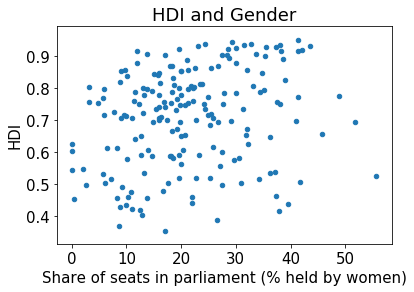

In [160]:
recent_data_expenditures_parliament = data_categorias_recente(['Composite indices', 'Gender'])
#recent_data_expenditures_parliament.info()

parliament_hdi = recent_data_expenditures_parliament[['Share of seats in parliament (% held by women)', 'Human Development Index (HDI)', 'income_group']].dropna() # Pega as colunas de interesse
parliament_hdi.rename(columns={'Human Development Index (HDI)':'HDI'}, inplace=True) # Renomea para visualizaçao

matplotlib.rcParams.update({'font.size': 15})
parliament_hdi.plot(kind = 'scatter',x = 'Share of seats in parliament (% held by women)', y ='HDI', title = 'HDI and Gender')

Parece que nao kkk

Seria legal ver se diminui o numero de violencias contra mulheres ?

## PERGUNTA 5 - Quantos paises têm aumentado a porcentagem de mulheres no parlamento nos ultimos anos? E como tem sido a evoluçao do Brasil comparada à da Islandia ?

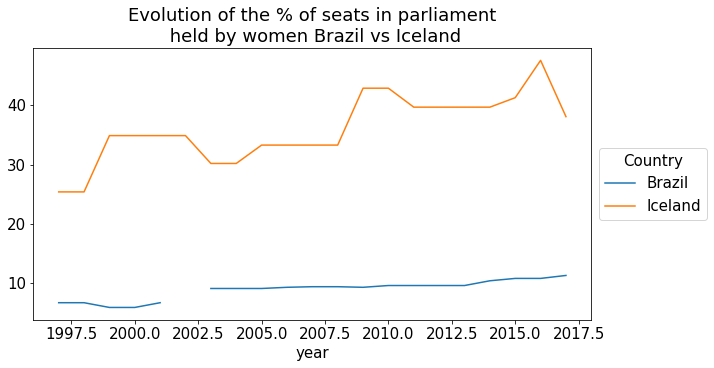

In [161]:
matplotlib.rcParams.update({'font.size': 15})

# Seleccionando as colunas com 'country_name' e 'Share of seats in parliament' para Brazil e Iceland
data_Brazil = data_tidy.loc[data_tidy['country_name'] == 'Brazil', ['year','Share of seats in parliament (% held by women)']]
data_Iceland = data_tidy.loc[data_tidy['country_name'] == 'Iceland', ['year','Share of seats in parliament (% held by women)']]

# Apagamos o valor com ano = 9999
data_Brazil = data_Brazil[data_Brazil.year != 9999]
data_Iceland = data_Iceland[data_Iceland.year != 9999]

# Pegamos os anos mais recentes
data_Brazil = data_Brazil[data_Brazil.year >= 1997]
data_Iceland = data_Iceland[data_Iceland.year >= 1997]

ax = data_Brazil.plot(x = 'year', y = 'Share of seats in parliament (% held by women)', title= "Evolution of the % of seats in parliament\n held by women Brazil vs Iceland", figsize=(10,5))
data_Iceland.plot(x = 'year', y = 'Share of seats in parliament (% held by women)', ax=ax)


_ = plt.legend(['Brazil', 'Iceland'], title = 'Country',loc='center left', bbox_to_anchor=(1, 0.5))


## PERGUNTA 6 - Qual atual situação do indicador 'Gender Inequality Index (GII)' no BRICS? Quais países do BRICS estão acima da média mundial?

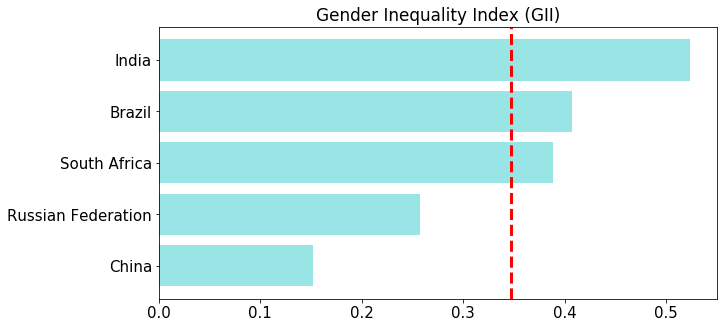

In [162]:
category_toPlot = 'Gender Inequality Index (GII)'
world_GII = recent_data_gender[recent_data_gender[category_toPlot].notnull() == True] # Removendo os valores NaN
brics_GII = world_GII[world_GII['country_name'].isin(brics)] # Filtrando pelos países do BRICS
w_GII_mean = world_GII[category_toPlot].mean() # Média mundial de 'Gender Inequality Index (GII)'

fig, ax1= plt.subplots(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 14})
brics_GII = brics_GII.sort_values(by = category_toPlot, ascending = True) # Organizando o dataframe do maior indicador para o menor
ax1.barh(brics_GII['country_name'], brics_GII[category_toPlot], color= 'c', alpha = 0.4) # Plotando o GII por país do BRICS
plt.axvline(w_GII_mean, color='r', alpha = 1,linestyle = '--', linewidth = 3) # Plotando a média mundial de GII)
ax1.set_title(category_toPlot)
pass

## PERGUNTA 7 - A formação de mulheres em SME, manufacturing and construction está correlacionada com  o GII?

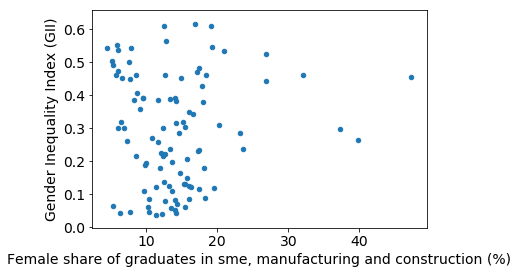

In [163]:
first_step = data_tidy[(data_tidy.year.isin([2017,9999]))] # Unindo os dados de 2017 e de 9999
graduation = first_step[['Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)', 'Gender Inequality Index (GII)']].dropna()
graduation

matplotlib.rcParams.update({'font.size': 14})
graduation.plot(kind = 'scatter',x = 'Female share of graduates in science, mathematics, engineering, manufacturing and construction at tertiary level (%)', y ='Gender Inequality Index (GII)')
plt.xlabel('Female share of graduates in sme, manufacturing and construction (%)')
pass


Podemos observar os indicadores estão correlacionados!

## PERGUNTA 8 - blabla

## PERGUNTA 9 - blabla

## PERGUNTA 10 - blabla